In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np
import json

In [45]:
with open("data.json") as f:
    data = json.load(f)

In [63]:
# Очищаем данные сразу от дубликатов в пределах снапшотов
cleaned_snapshots = []

for snapshot in data['snapshots']:
    timestamp = snapshot['timestamp']
    
    # Удаляем дубликаты офферов в пределах одного снапшота по полю 'link'
    seen_links = set()
    unique_offers = []
    
    for offer in snapshot['offers']:
        if offer['link'] not in seen_links:
            seen_links.add(offer['link'])
            unique_offers.append(offer)
    
    # Добавляем очищенный снапшот
    cleaned_snapshots.append({
        'timestamp': timestamp,
        'offers': unique_offers
    })

# Заменяем исходные данные на очищенные
data['snapshots'] = cleaned_snapshots

print(f"Очищено! Осталось {len(cleaned_snapshots)} снапшотов")

# Проверяем результаты
total_offers_before = sum(len(snapshot['offers']) for snapshot in data['snapshots'])
print(f"Всего объявлений после очистки: {total_offers_before}")

# Дополнительная проверка: убеждаемся что в каждом снапшоте нет дубликатов
for i, snapshot in enumerate(data['snapshots']):
    links = [offer['link'] for offer in snapshot['offers']]
    if len(links) != len(set(links)):
        print(f"ВНИМАНИЕ: в снапшоте {i} остались дубликаты!")
    else:
        print(f"✓ Снапшот {i} очищен: {len(links)} уникальных объявлений")

Очищено! Осталось 22 снапшотов
Всего объявлений после очистки: 9314
✓ Снапшот 0 очищен: 426 уникальных объявлений
✓ Снапшот 1 очищен: 432 уникальных объявлений
✓ Снапшот 2 очищен: 432 уникальных объявлений
✓ Снапшот 3 очищен: 434 уникальных объявлений
✓ Снапшот 4 очищен: 428 уникальных объявлений
✓ Снапшот 5 очищен: 419 уникальных объявлений
✓ Снапшот 6 очищен: 430 уникальных объявлений
✓ Снапшот 7 очищен: 410 уникальных объявлений
✓ Снапшот 8 очищен: 411 уникальных объявлений
✓ Снапшот 9 очищен: 419 уникальных объявлений
✓ Снапшот 10 очищен: 441 уникальных объявлений
✓ Снапшот 11 очищен: 435 уникальных объявлений
✓ Снапшот 12 очищен: 444 уникальных объявлений
✓ Снапшот 13 очищен: 435 уникальных объявлений
✓ Снапшот 14 очищен: 411 уникальных объявлений
✓ Снапшот 15 очищен: 394 уникальных объявлений
✓ Снапшот 16 очищен: 396 уникальных объявлений
✓ Снапшот 17 очищен: 391 уникальных объявлений
✓ Снапшот 18 очищен: 418 уникальных объявлений
✓ Снапшот 19 очищен: 420 уникальных объявлений
✓ 

In [64]:
df_last = pd.DataFrame(data['snapshots'][-1]['offers'])

=== ДЕБАГ ИНФОРМАЦИЯ ===
Всего продавцов для отображения: 15

=== ПОЗИЦИОНИРОВАНИЕ АВАТАРОК ===
Столбец 0: x_center=0.00, y_top=98200.00
Столбец 1: x_center=1.00, y_top=45300.00
Столбец 2: x_center=2.00, y_top=37759.67
Столбец 3: x_center=3.00, y_top=36437.47
Столбец 4: x_center=4.00, y_top=35500.00
Столбец 5: x_center=5.00, y_top=34000.00
Столбец 6: x_center=6.00, y_top=29100.00
Столбец 7: x_center=7.00, y_top=25400.00
Столбец 8: x_center=8.00, y_top=25135.00
Столбец 9: x_center=9.00, y_top=23000.77
Столбец 10: x_center=10.00, y_top=22362.53
Столбец 11: x_center=11.00, y_top=22362.53
Столбец 12: x_center=12.00, y_top=21600.00
Столбец 13: x_center=13.00, y_top=21432.01
Столбец 14: x_center=14.00, y_top=21219.96

--- Обрабатываем 0: dedod ---
Позиция аватарки: x=[-0.30, 0.30], y=[100164.00, 109984.00]
✅ Аватарка добавлена

--- Обрабатываем 1: SelfishBitch ---
Позиция аватарки: x=[0.70, 1.30], y=[47264.00, 57084.00]
✅ Аватарка добавлена

--- Обрабатываем 2: Likonboy ---
Позиция аватарки:

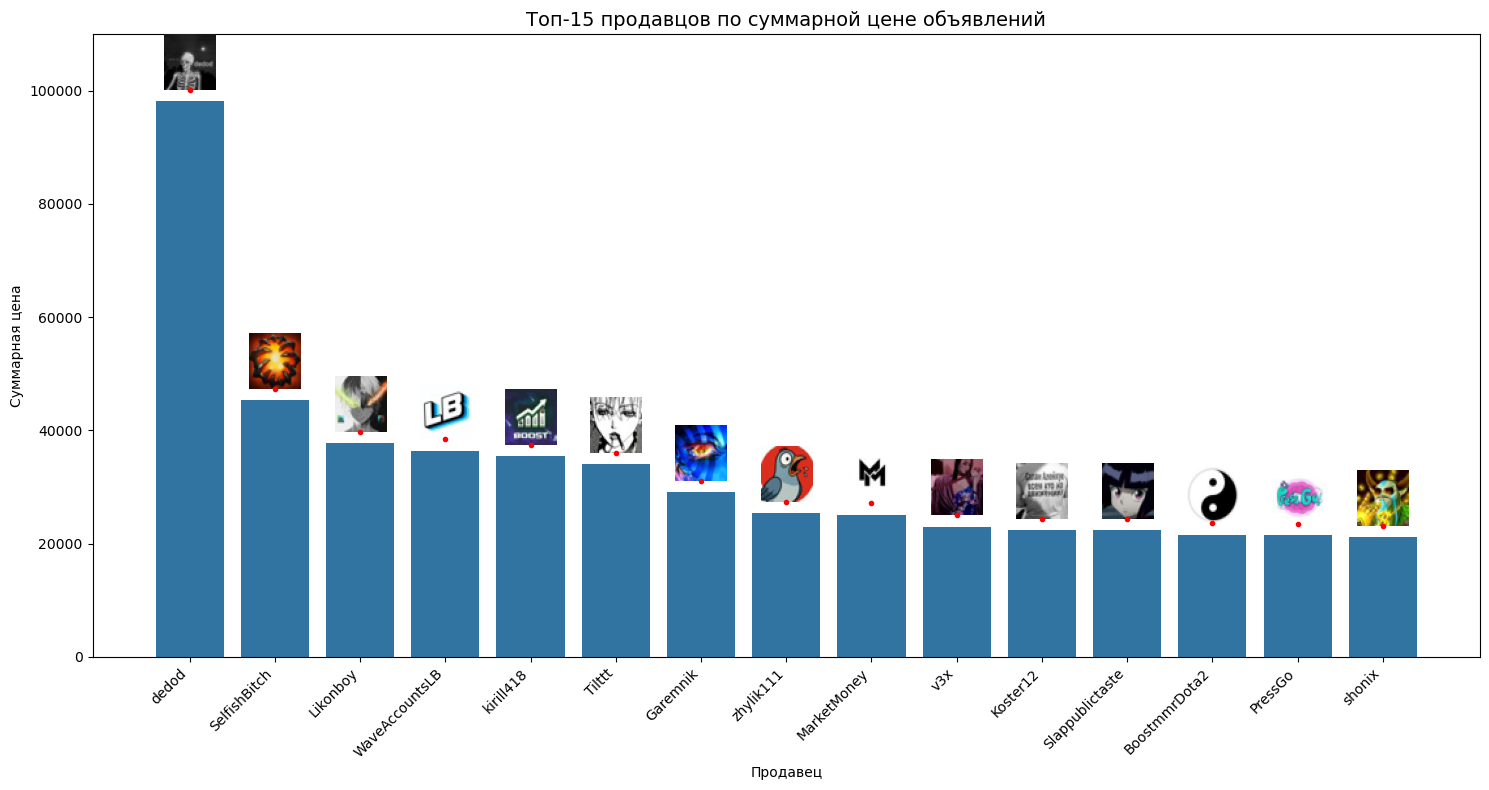

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from io import BytesIO
from PIL import Image, ImageDraw
import numpy as np
from IPython.display import display

# Подготовка данных
seller_stats = df_last[df_last['price'] < 15_000].groupby('seller_link').agg({
    'price': 'sum',
    'seller_image_url': 'first',
    'seller_name': 'first'
}).reset_index()

seller_stats = seller_stats.sort_values('price', ascending=False).head(15)

print("=== ДЕБАГ ИНФОРМАЦИЯ ===")
print(f"Всего продавцов для отображения: {len(seller_stats)}")

# Создание графика
fig, ax = plt.subplots(figsize=(15, 8))
bars = sns.barplot(data=seller_stats, x='seller_name', y='price', ax=ax)

print(f"\n=== ПОЗИЦИОНИРОВАНИЕ АВАТАРОК ===")

# Получаем данные о позициях столбцов
x_positions = []
for i, patch in enumerate(bars.patches):
    x_center = patch.get_x() + patch.get_width() / 2
    y_top = patch.get_height()
    x_positions.append((x_center, y_top))
    print(f"Столбец {i}: x_center={x_center:.2f}, y_top={y_top:.2f}")

# Добавление аватарок
for i, (_, row) in enumerate(seller_stats.iterrows()):
    try:
        print(f"\n--- Обрабатываем {i}: {row['seller_name']} ---")
        
        # Загрузка изображения
        response = requests.get(row['seller_image_url'], timeout=10)
        img = Image.open(BytesIO(response.content))
        img_resized = img.resize((40, 40))
        img_array = np.array(img_resized)
        
        # Получаем позицию для этого столбца
        x_center, y_top = x_positions[i]
        
        # Вычисляем координаты для аватарки
        avatar_width = 0.6  # ширина аватарки в координатах графика
        avatar_height = max(seller_stats['price']) * 0.1  # высота относительно данных
        
        x_left = x_center - avatar_width / 2
        x_right = x_center + avatar_width / 2
        y_bottom = y_top + max(seller_stats['price']) * 0.02  # небольшой отступ от вершины
        y_top_avatar = y_bottom + avatar_height
        
        print(f"Позиция аватарки: x=[{x_left:.2f}, {x_right:.2f}], y=[{y_bottom:.2f}, {y_top_avatar:.2f}]")
        
        # Добавляем аватарку
        ax.imshow(img_array, extent=[x_left, x_right, y_bottom, y_top_avatar], aspect='auto', zorder=10)
        
        # Добавляем красную точку для отладки позиции
        ax.plot(x_center, y_bottom, 'ro', markersize=3, zorder=11)
        
        print(f"✅ Аватарка добавлена")
        
    except Exception as e:
        print(f"❌ Ошибка: {e}")

plt.title('Топ-15 продавцов по суммарной цене объявлений', fontsize=14)
plt.xlabel('Продавец')
plt.ylabel('Суммарная цена')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Всего проданных объявлений: 229
Период анализа: 2025-09-28 23:07:27 - 2025-09-29 17:00:01


C:\Users\Лев\AppData\Local\Temp\ipykernel_15140\3665618019.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  sold_df['datetime_hour_sold'] = sold_df['timestamp_sold'].dt.floor('H')


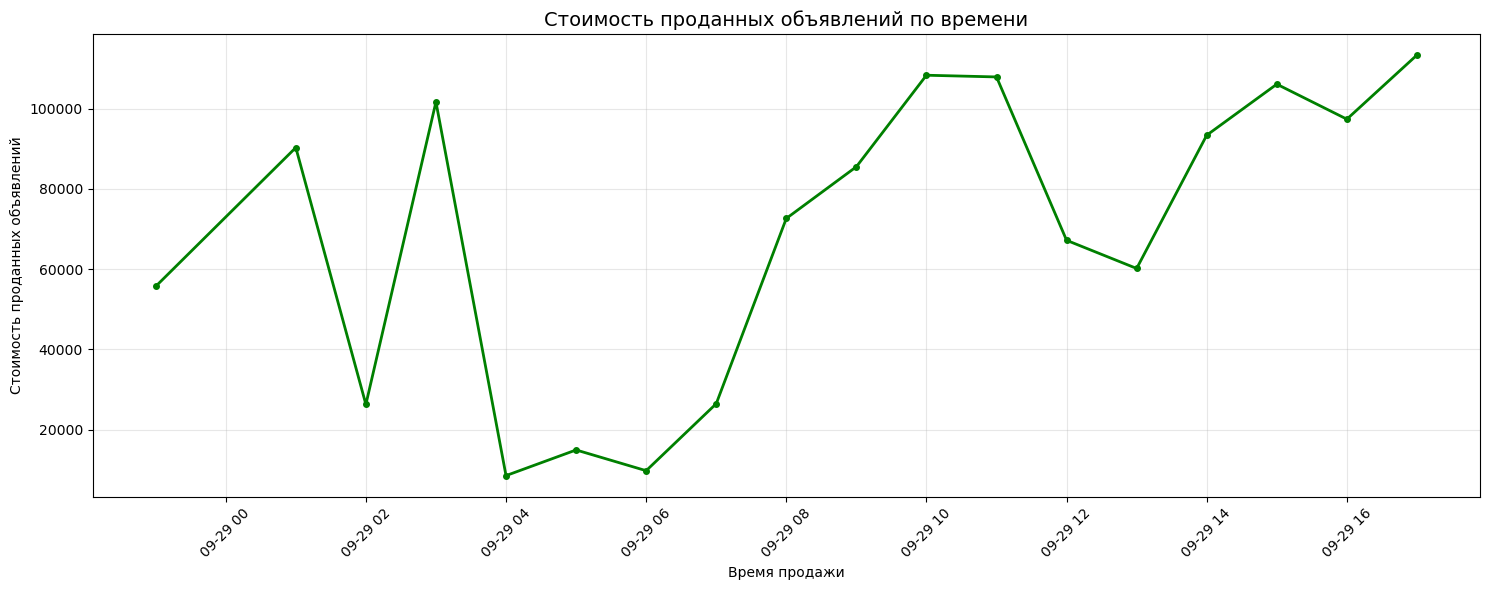

Общая стоимость проданных объявлений: 1245622.26
Средняя стоимость проданного объявления: 5439.40
Медианная стоимость: 4765.78
Максимальная стоимость продажи за час: 113351.94
Среднее время между снапшотами: 0.98 часов


In [ ]:
# Находим проданные объявления
sold_offers = []

# Проходим по всем снапшотам кроме последнего
for i in range(len(data['snapshots']) - 1):
    current_time = pd.to_datetime(data['snapshots'][i]['timestamp'])
    next_time = pd.to_datetime(data['snapshots'][i + 1]['timestamp'])
    
    # Находим объявления, которые есть в текущем снапшоте, но отсутствуют в следующем
    current_offers = set(offer['link'] for offer in data['snapshots'][i]['offers'])
    next_offers = set(offer['link'] for offer in data['snapshots'][i + 1]['offers'])
    
    sold_links = current_offers - next_offers
    
    # Добавляем информацию о проданных объявлениях
    for offer in data['snapshots'][i]['offers']:
        if offer['link'] in sold_links:
            sold_offers.append({
                **offer,
                'timestamp_sold': next_time,  # Время, когда объявление пропало
                'sale_interval_hours': (next_time - current_time).total_seconds() / 3600
            })

# Создаем DataFrame проданных объявлений
sold_df = pd.DataFrame(sold_offers)

sold_df = sold_df[sold_df['price'] < 15_000]

print(f"Всего проданных объявлений: {len(sold_df)}")
print(f"Период анализа: {df['timestamp'].min()} - {df['timestamp'].max()}")

if len(sold_df) > 0:
    # Группируем проданные объявления по времени (например, по дням)
    sold_df['date_sold'] = sold_df['timestamp_sold'].dt.date
    sold_df['datetime_hour_sold'] = sold_df['timestamp_sold'].dt.floor('H')
    
    # Суммируем стоимость проданных объявлений по времени
    sales_by_hour = sold_df.groupby('datetime_hour_sold')['price'].sum()
    
    # Строим график
    plt.figure(figsize=(15, 6))
    plt.plot(sales_by_hour.index, sales_by_hour.values, linewidth=2, marker='o', markersize=4, color='green')
    plt.title('Стоимость проданных объявлений по времени', fontsize=14)
    plt.xlabel('Время продажи')
    plt.ylabel('Стоимость проданных объявлений')
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # Дополнительная статистика
    print(f"Общая стоимость проданных объявлений: {sold_df['price'].sum():.2f}")
    print(f"Средняя стоимость проданного объявления: {sold_df['price'].mean():.2f}")
    print(f"Медианная стоимость: {sold_df['price'].median():.2f}")
    print(f"Максимальная стоимость продажи за час: {sales_by_hour.max():.2f}")
    print(f"Среднее время между снапшотами: {sold_df['sale_interval_hours'].mean():.2f} часов")
    
else:
    print("Не найдено проданных объявлений по заданному критерию")

In [67]:
df[df['price'] < 1000]

,title,link,price,seller_link,seller_name,seller_image_url,mmr,time,decency,timestamp
263,[6474 ММР ]🔥ПОРЯДКА 10000+ 🔥ОТКРЫТЫЙ РЕЙТИНГ🔥П...,https://funpay.com/lots/offer?id=51978394,855.397149,https://funpay.com/users/5356664/,nexy777,https://sfunpay.com/s/avatar/eh/yy/ehyy9qomcf0...,6474,189,10700.0,2025-09-28 23:07:27
383,👾【ТИТАН| 5900 ММР | РЕЙТИНГ】🌈【ПОРЯДА: 10000】...,https://funpay.com/lots/offer?id=43193593,990.216356,https://funpay.com/users/14562943/,deust77,https://sfunpay.com/s/avatar/zm/p5/zmp52m78zza...,5900,200,10000.0,2025-09-28 23:07:27
817,[6474 ММР ]🔥ПОРЯДКА 10000+ 🔥ОТКРЫТЫЙ РЕЙТИНГ🔥П...,https://funpay.com/lots/offer?id=51978394,855.397149,https://funpay.com/users/5356664/,nexy777,https://sfunpay.com/s/avatar/eh/yy/ehyy9qomcf0...,6474,189,10700.0,2025-09-28 23:52:28
574,👾【ТИТАН| 5900 ММР | РЕЙТИНГ】🌈【ПОРЯДА: 10000】...,https://funpay.com/lots/offer?id=43193593,990.174144,https://funpay.com/users/14562943/,deust77,https://sfunpay.com/s/avatar/zm/p5/zmp52m78zza...,5900,200,10000.0,2025-09-28 23:52:28
1250,[6474 ММР ]🔥ПОРЯДКА 10000+ 🔥ОТКРЫТЫЙ РЕЙТИНГ🔥П...,https://funpay.com/lots/offer?id=51978394,855.397149,https://funpay.com/users/5356664/,nexy777,https://sfunpay.com/s/avatar/eh/yy/ehyy9qomcf0...,6474,189,10700.0,2025-09-28 23:55:01
1008,👾【ТИТАН| 5900 ММР | РЕЙТИНГ】🌈【ПОРЯДА: 10000】...,https://funpay.com/lots/offer?id=43193593,990.174144,https://funpay.com/users/14562943/,deust77,https://sfunpay.com/s/avatar/zm/p5/zmp52m78zza...,5900,200,10000.0,2025-09-28 23:55:01
1687,[6474 ММР ]🔥ПОРЯДКА 10000+ 🔥ОТКРЫТЫЙ РЕЙТИНГ🔥П...,https://funpay.com/lots/offer?id=51978394,855.397149,https://funpay.com/users/5356664/,nexy777,https://sfunpay.com/s/avatar/eh/yy/ehyy9qomcf0...,6474,189,10700.0,2025-09-28 23:56:01
1451,👾【ТИТАН| 5900 ММР | РЕЙТИНГ】🌈【ПОРЯДА: 10000】...,https://funpay.com/lots/offer?id=43193593,990.174144,https://funpay.com/users/14562943/,deust77,https://sfunpay.com/s/avatar/zm/p5/zmp52m78zza...,5900,200,10000.0,2025-09-28 23:56:01
2121,[6474 ММР ]🔥ПОРЯДКА 10000+ 🔥ОТКРЫТЫЙ РЕЙТИНГ🔥П...,https://funpay.com/lots/offer?id=51978394,855.397149,https://funpay.com/users/5356664/,nexy777,https://sfunpay.com/s/avatar/eh/yy/ehyy9qomcf0...,6474,189,10700.0,2025-09-29 00:00:02
1894,👾【ТИТАН| 5900 ММР | РЕЙТИНГ】🌈【ПОРЯДА: 10000】...,https://funpay.com/lots/offer?id=43193593,990.174144,https://funpay.com/users/14562943/,deust77,https://sfunpay.com/s/avatar/zm/p5/zmp52m78zza...,5900,200,10000.0,2025-09-29 00:00:02
